In [36]:
# Notebook to slim the production files for the LPR
import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import re

from cycler import cycler
import matplotlib.cm as cm

# Set Dark2 as the default color cycle
dark2 = cm.get_cmap('Dark2').colors
plt.rcParams['axes.prop_cycle'] = cycler(color=dark2)

%matplotlib widget

/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_61925/1886163394.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  dark2 = cm.get_cmap('Dark2').colors


In [37]:
Bi_ion_25bar = pd.read_hdf("../data/GammaTables/GammaTable_Bi_ion_25bar_merged.h5", "MC/E")
Bi_ion_15bar = pd.read_hdf("../data/GammaTables/GammaTable_Bi_ion_15bar_merged.h5", "MC/E")
display(Bi_ion_15bar)
display(Bi_ion_25bar)

,event_id,CreatorProc,energy,mother_E,initial_x,initial_y,initial_z,final_x,final_y,final_z,contained
0,640000,compt,2.505360,1.896045,-62,1254,-778,134,1129,-805,True
1,640001,compt,2.447687,2.447687,-660,546,1289,-683,596,807,True
2,640002,phot,2.447687,2.447687,-626,-358,1254,-634,-272,1128,True
3,640003,conv,2.472469,2.472469,-17,364,-1275,-752,-85,-640,True
4,640004,compt,2.447687,2.447687,-858,-937,1071,-780,-879,1075,True
...,...,...,...,...,...,...,...,...,...,...,...
204,640000204,compt,2.447687,2.447687,-1044,-76,-1266,-243,177,68,True
205,640000205,compt,2.447693,1.838377,-117,1250,-238,-238,1111,-451,True
206,640000206,compt,2.447687,2.447687,-181,571,1279,-251,243,182,True
207,640000207,compt,2.447687,2.447687,-489,159,1270,-999,402,-307,True


,event_id,CreatorProc,energy,mother_E,initial_x,initial_y,initial_z,final_x,final_y,final_z,contained
0,360000,compt,2.438282,2.447687,204,-133,1062,341,372,938,True
1,360001,compt,2.447687,2.447687,-195,-176,1059,-116,-717,406,True
2,360002,compt,2.362164,2.447687,955,-511,-64,-3,-203,161,True
3,360003,compt,2.447687,2.447687,-364,963,-1074,-92,900,-749,True
4,360004,compt,2.447687,2.447687,-232,538,-1067,-745,-365,-533,True
...,...,...,...,...,...,...,...,...,...,...,...
161,360000161,compt,2.482459,1.661272,883,605,-337,47,719,-250,True
162,360000162,compt,2.322538,2.447687,-268,-1038,512,-307,-889,641,True
163,360000163,compt,2.447687,2.447687,353,657,1078,198,753,979,True
164,360000164,compt,2.447687,2.447687,527,919,-320,498,472,-178,True


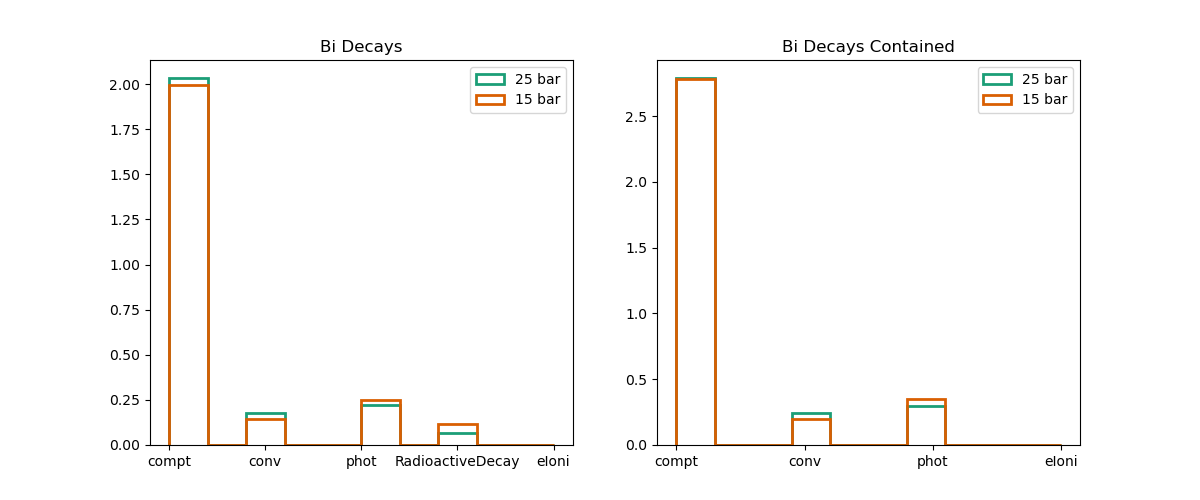

In [50]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)  # row, col,index
plt.hist(Bi_ion_25bar.CreatorProc, histtype="step", linewidth=2, density=True, label = "25 bar");
plt.hist(Bi_ion_15bar.CreatorProc, histtype="step", linewidth=2, density=True, label = "15 bar");

plt.title("Bi Decays")
plt.legend()

plt.subplot(1, 2, 2)  # row, col,index
plt.hist(Bi_ion_25bar[Bi_ion_25bar.contained == True].CreatorProc, histtype="step", linewidth=2, density=True, label = "25 bar");
plt.hist(Bi_ion_15bar[Bi_ion_15bar.contained == True].CreatorProc, histtype="step", linewidth=2, density=True, label = "15 bar");

plt.title("Bi Decays Contained")
plt.legend()

Text(0.5, 0, 'Energy [MeV]')

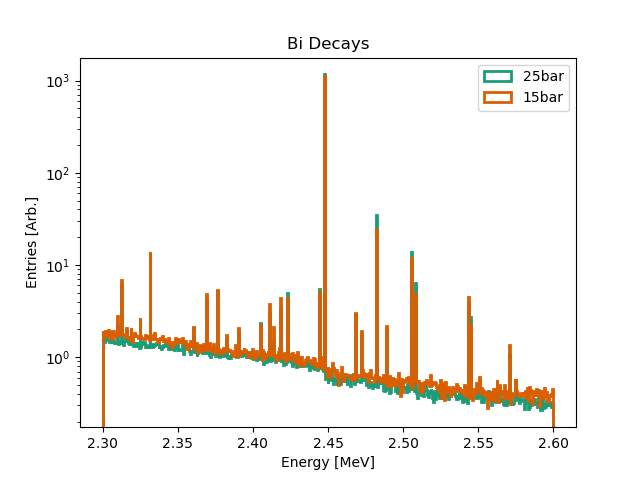

In [39]:
plt.figure()

plt.hist(Bi_ion_25bar.energy, bins = np.linspace(2.3,2.6,500) ,histtype="step", linewidth=2,density=True, label = "25bar");
plt.hist(Bi_ion_15bar.energy, bins = np.linspace(2.3,2.6,500) ,histtype="step", linewidth=2,density=True, label = "15bar");

plt.title("Bi Decays")
plt.semilogy()
plt.legend()
plt.ylabel("Entries [Arb.]")
plt.xlabel("Energy [MeV]")

In [40]:
print("Fraction Uncontained Bi 25 bar:", 100*len(Bi_ion_25bar[Bi_ion_25bar.contained == False])/len(Bi_ion_25bar[Bi_ion_25bar.contained == True]))
print("Fraction Uncontained Bi 15 bar:", 100*len(Bi_ion_15bar[Bi_ion_15bar.contained == False])/len(Bi_ion_15bar[Bi_ion_15bar.contained == True]))

Fraction Uncontained Bi 25 bar: 20.928489742168008
Fraction Uncontained Bi 15 bar: 20.449867808975604
